# This is a test for plotting 1D CoreFlows Results

We can describe things here!

Even with weird formulas!

$\partial_t \rho + \text{div}(\rho \mathbf{u}) = 0$

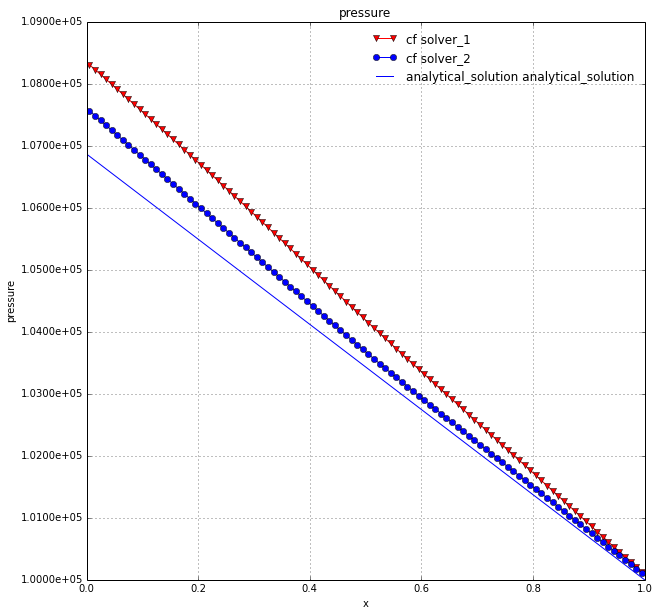

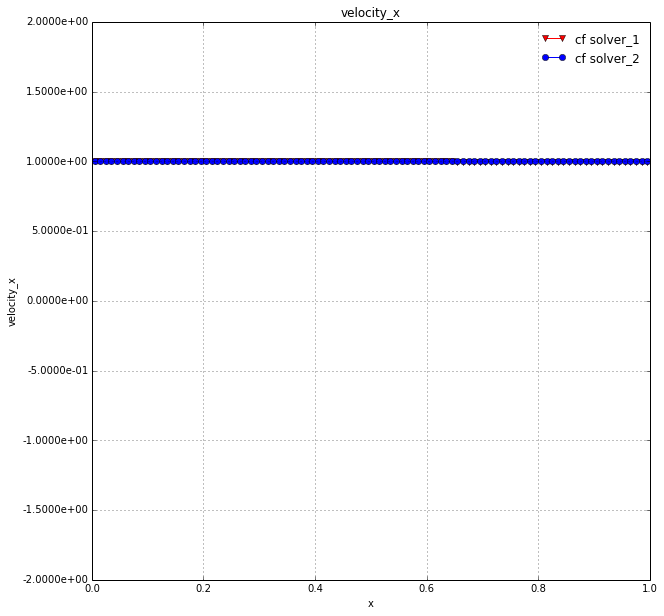

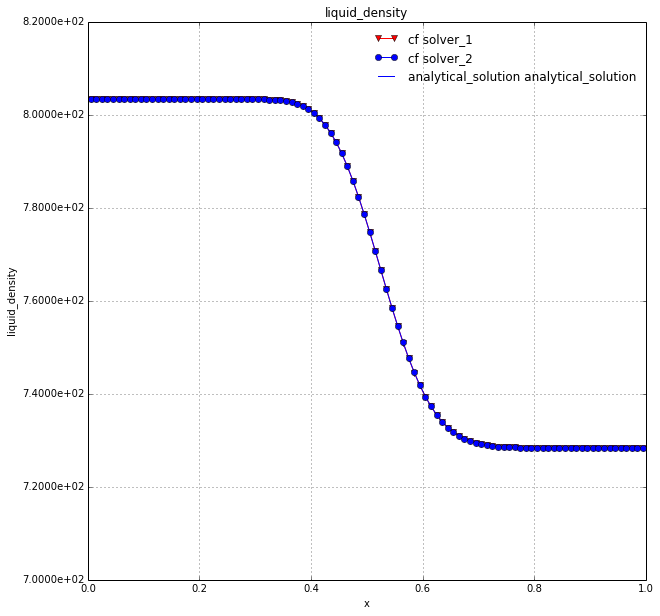

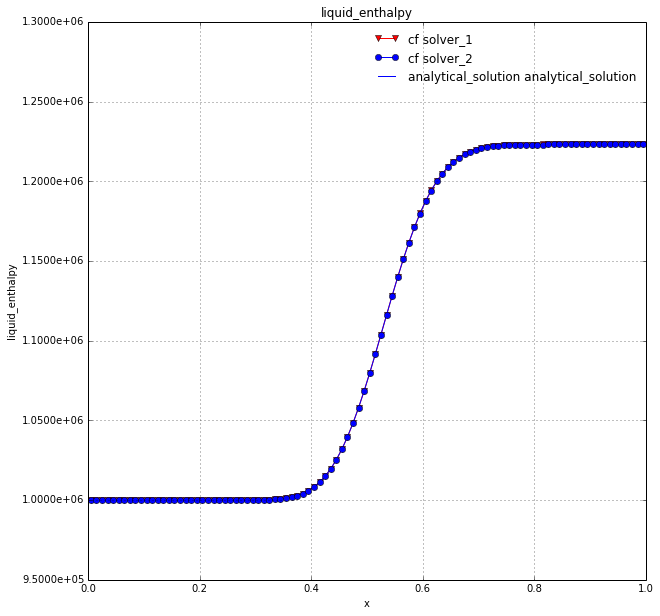

In [9]:
import os
import sys
import testEnv

# import the resultsBase module
import resultsBase as rb

import default_settings as settings

# enable plotting into the notebook : for jupyter only
#%matplotlib inline

path_to_test_data = "../python/tests/data"

# creating a result base with CoreFlows results
# located in a list of directories
db_cf_1 = rb.cf_result_reader.create_result_list_1D(
    dir_list=[os.path.join(path_to_test_data,'CF-test1')],
    solver="solver_1"
)
# extracting the stationnary results
db_cf_1 = rb.extract_last_step_elt(db_cf_1)


db_cf_2 = rb.cf_result_reader.create_result_list_1D(
    dir_list=[os.path.join(path_to_test_data,'CF-test2')],
    solver="solver_2"
)
# extracting the stationnary results
db_cf_2 = rb.extract_last_step_elt(db_cf_2)

#creating a result base with the analytical reference solution
db_ref_sol = rb.analytical_result_reader.create_result_list(
    dir_list=[os.path.join(path_to_test_data,'analytical_solution')],
    tags=['ref_sol']
)

# creating a result base by taking the union
# of all previous result bases
#db = db_cf + db_ref_sol
db = db_cf_1 + db_cf_2 + db_ref_sol


# list of variable we want to display
variables = ['pressure', 'velocity_x', 'liquid_density', 'liquid_enthalpy']

# customized settings for the y_range parameters
# specified for each variable
y_range = {
    'velocity_x': [-2.0, 2.0],
    #    'liquid_density': [7.16e2, 7.17e2],
    #    'liquid_enthalpy': [1.29e6, 1.31e6],
}

my_view_settings = {
    '*solver_1*': {'marker': 'v', 'color' : 'red'},
    '*solver_2*': {'marker': 'o', 'color' : 'blue'},
}

# plotting all results
rb.plot_all_probes(
    db, variables, view_settings=my_view_settings, y_range=y_range)
